In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
data = data.drop(columns = "id")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x.shape

(325, 367)

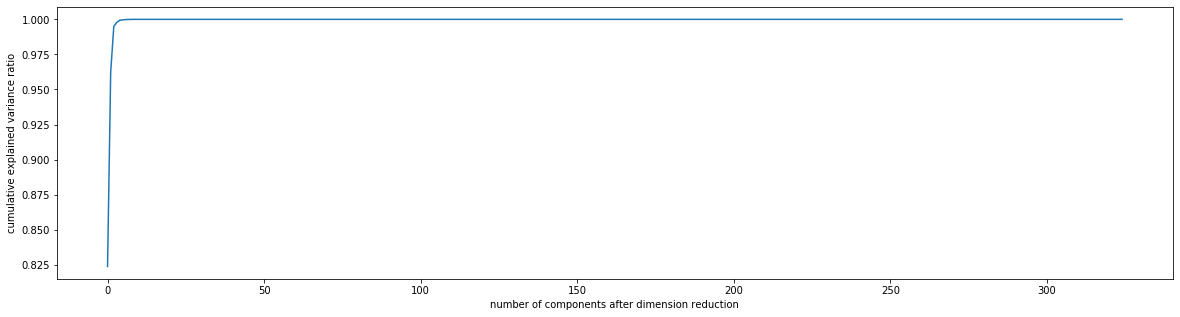

In [2]:
######主成分方差贡献率#######
pca_line = PCA().fit(x)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

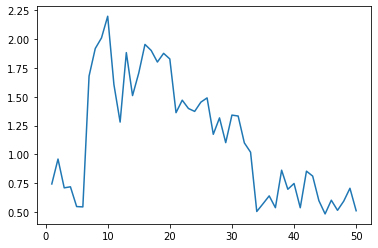

In [5]:
#######细化学习曲线########
mse_1= []
col_1 = range(1,51,1)
for i in col_1:
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFR(n_estimators = 20 ,random_state = 0),x_dr,y,cv = 10).mean()
    mse_1.append(once * -1)  
plt.plot(col_1,mse_1)
plt.show()

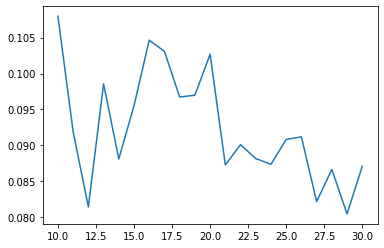

In [6]:
####细分学习曲线######
mse_2 = []
col_2 = range(10,31,1)
for i in col_2:
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFR(n_estimators=20,random_state=0),x_dr,y,scoring = "neg_mean_squared_error",cv=10).mean()
    mse_2.append(once * -1)
plt.plot(col_2,mse_2)
plt.show()
print("mse最小时所需要的降维为{}".format(np.argmin(mse_2)+10))

In [11]:
n =  np.argmin(mse_2)+10

In [12]:
pca = PCA(n).fit(x)
v = pca.components_

In [14]:
v.shape

(29, 367)

In [15]:
x.shape

(325, 367)

In [17]:
v.T

array([[-3.68186014e-07, -1.26186466e-06,  2.68609904e-07, ...,
         4.34844753e-05,  7.33303605e-03,  4.00045966e-04],
       [-3.44809636e-09, -4.75485485e-09, -8.30197905e-09, ...,
        -1.53963257e-06,  3.27474841e-05,  2.89259691e-05],
       [ 4.64812533e-08,  9.48581441e-08, -3.29874765e-08, ...,
        -1.57282463e-04, -5.31829652e-05,  1.42551844e-04],
       ...,
       [ 3.72595113e-06,  9.11937921e-06, -1.49826044e-04, ...,
        -2.17104289e-02,  2.73331508e-03, -5.47971858e-02],
       [ 2.69886187e-02,  6.01256025e-01,  9.06507301e-02, ...,
        -1.09456354e-02,  7.60565237e-03,  5.13931437e-04],
       [ 6.78422733e-07,  1.20037096e-06, -5.74119240e-07, ...,
         1.83647206e-05,  2.29695711e-05, -4.70389563e-04]])

In [18]:
x_hat = np.dot(x,v.T)

In [19]:
x_hat.shape

(325, 29)

In [23]:
var = ["var1","var2","var3","var4","var5","var6","var7","var8","var9"
       ,"var10","var11","var12","var13","var14","var15","var16","var7"
       ,"var18","var19","var20","var21","var22","var23","var24","var25"
       ,"var26","var27","var28","var29"]

In [24]:
fe_x = pd.DataFrame(x_hat,columns = var )
fe_x

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29
0,-7.544262e+07,6.978464e+07,1.158338e+07,3.938122e+06,-5.263096e+06,-3.694802e+06,2.072223e+06,-7.272806e+05,-3.222741e+05,-548834.192030,...,65943.962732,-34126.262257,-118478.652690,198050.700746,-135529.102999,14395.087944,83705.639234,36030.121163,-26298.388382,5684.662989
1,-7.477201e+07,6.928593e+07,1.151495e+07,3.899690e+06,-5.370658e+06,-3.652817e+06,2.061526e+06,-7.910242e+05,-3.423861e+05,-550370.283754,...,60281.682719,-30028.123827,-124759.158959,198392.118247,-132895.899235,16357.862536,83014.473241,35427.247419,-27040.316185,5349.752334
2,-7.450390e+07,6.908530e+07,1.148679e+07,3.881920e+06,-5.415962e+06,-3.632616e+06,2.039974e+06,-8.181706e+05,-3.506756e+05,-551506.628802,...,57681.601500,-29213.191086,-126661.046261,198802.251938,-131015.594084,18934.534120,82337.331384,35182.054052,-28269.345437,5021.817206
3,-7.382183e+07,6.858506e+07,1.141726e+07,3.837621e+06,-5.532391e+06,-3.579550e+06,1.995225e+06,-8.908535e+05,-3.730168e+05,-552753.802805,...,51425.689130,-25379.907657,-133049.456069,197995.935788,-130391.089531,17821.107205,82134.641354,34625.335499,-28054.942065,4787.470840
4,-7.354616e+07,6.837734e+07,1.138794e+07,3.818748e+06,-5.579657e+06,-3.557227e+06,1.964795e+06,-9.190955e+05,-3.810595e+05,-555327.933585,...,48895.015838,-24393.591299,-135386.995781,197566.075814,-129820.525503,17932.555176,81762.365504,34442.664710,-28298.857013,4703.723683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-1.054649e+08,-3.361080e+06,5.321727e+07,1.164937e+06,-7.885591e+06,-2.887707e+06,-1.708228e+05,-1.336983e+06,1.778233e+05,-654767.954837,...,49337.513415,-23417.459112,-139417.159358,190779.865846,-131736.095310,16182.965145,82400.509970,34435.667586,-26709.819424,4050.054479
321,-1.051176e+08,-3.598287e+06,5.316633e+07,1.434057e+06,-7.928229e+06,-2.781747e+06,-9.503986e+04,-1.569330e+06,6.564443e+05,-656485.571089,...,49830.668697,-21886.328205,-140409.110923,192542.180479,-133215.043157,14696.551589,83282.576800,34733.438100,-26360.804230,4025.777484
322,-1.046005e+08,-3.955080e+06,5.308507e+07,1.838258e+06,-7.995308e+06,-2.621880e+06,1.972787e+04,-1.919805e+06,1.373964e+06,-657038.855422,...,50037.328591,-19586.407786,-140570.419966,196302.857315,-132834.068672,16254.566398,82773.365717,34578.015087,-26836.630344,4008.835525
323,-1.042607e+08,-4.188587e+06,5.302740e+07,2.109899e+06,-8.036302e+06,-2.517249e+06,9.477021e+04,-2.150255e+06,1.853695e+06,-657859.786197,...,49630.890633,-18294.189952,-139945.087139,198564.742653,-133862.119360,15916.291092,83248.992917,34708.699107,-26642.650127,3974.864770


In [25]:
fe_x.to_csv(r"C:\Users\Administrator\Desktop\x_fe.csv")

In [26]:
x_pca = pca.transform(x)

In [29]:
x_fe = pd.DataFrame(x_pca)

In [31]:
x_fe.head()
x_fe.shape

(325, 29)

In [33]:
pca = PCA(n).fit(x)
v = pca.components_
x_pca = pd.DataFrame(pca.transform(x))
var = ["var1","var2","var3","var4","var5","var6","var7","var8","var9"
       ,"var10","var11","var12","var13","var14","var15","var16","var7"
       ,"var18","var19","var20","var21","var22","var23","var24","var25"
       ,"var26","var27","var28","var29"]
x_fe = pd.DataFrame(x_pca,columns = var )
x_fe
x_fe.to_csv(r"C:\Users\Administrator\Desktop\x_fe.csv")


#======【TIME WARNING:1mins 30s】======#
error  = cross_val_score(RFR(n_estimators=100,random_state=0),x_pca,y,scoring = "neg_mean_squared_error",cv=10).mean()
error = error * -1
print(error)

0.0674447704545454


In [36]:
from sklearn.neighbors import KNeighborsRegressor as KNN
error_KNN =  cross_val_score(KNN(),x_pca,y,scoring = "neg_mean_squared_error",cv=10).mean()
error_KNN = error_KNN * -1
print(error_KNN)

0.05586234848484849


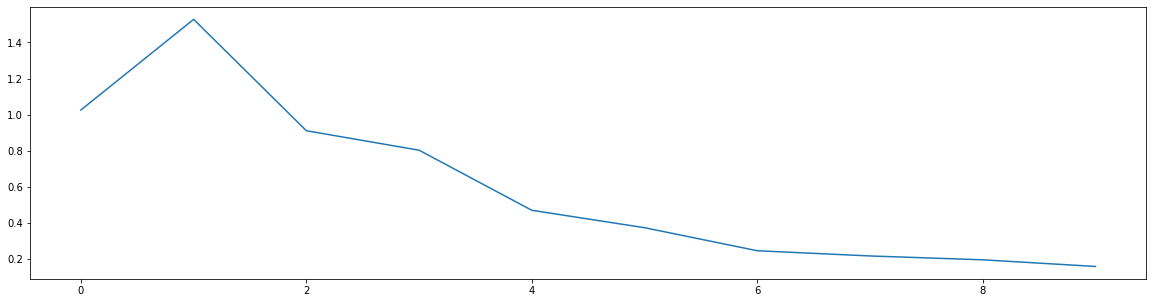

In [40]:
######KNN的k值学习曲线#######
mse_3 = []
col_3 = range(10)
for i in col_3:
    x_dr = PCA(21).fit_transform(x)
    once = cross_val_score(KNN(i+1),x_dr,y,cv=10).mean()
    mse_3.append(once * -1)
plt.figure(figsize=[20,5])
plt.plot(range(10),mse_3)
plt.show()

In [41]:
n = np.argmin(mse_3)
print("mse最小时所需要的聚类数为{}".format(np.argmin(mse_2)))

mse最小时所需要的聚类数为19
